In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
File 1: “calendar.csv” 
Contains information about the dates the products sold.
• date: The date in a “y-m-d” format.
• wm_yr_wk: The id of the week the date belongs to.
• weekday: The type of the day (Saturday, Sunday, …, Friday).
• wday: The id of the weekday, starting from Saturday.
• month: The month of the date.
• year: The year of the date.
• event_name_1: If the date includes an event, the name of this event.
• event_type_1: If the date includes an event, the type of this event.
• event_name_2: If the date includes a second event, the name of this event.
• event_type_2: If the date includes a second event, the type of this event.
• snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI 
      allow SNAP  purchases on the examined date. 1 indicates that SNAP purchases are allowed.
      [SNAP purchase]The United States federal government provides a nutrition assistance benefit called 
      the Supplement Nutrition Assistance Program (SNAP).  
      SNAP provides low income families and individuals with an Electronic Benefits Transfer debit card 
      to purchase food products.  In many states, the monetary benefits are dispersed to people 
      across 10 days of the month and on each of these days 1/10 of the people will receive the benefit 
      on their card.  More information about the SNAP program can be found here: 
      https://www.fns.usda.gov/snap/supplemental-nutrition-assistance-program 
'''

calendar = pd.read_csv("calendar.csv", index_col=0, parse_dates=True)
calendar

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,
2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0


In [15]:
'''
File 2: “sell_prices.csv”
Contains information about the price of the products sold per store and date.
• store_id: The id of the store where the product is sold. 
• item_id: The id of the product.
• wm_yr_wk: The id of the week.
• sell_price: The price of the product for the given week/store. 
  The price is provided per week (average across seven days). 
  If not available, this means that the product was not sold during the examined week. 
  Note that although prices are constant at weekly basis, they may change through time (both training and test set).  

'''

sell_prices = pd.read_csv("sell_prices.csv")
sell_prices


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [7]:
'''
File 3: “sales_train.csv” 
Contains the historical daily unit sales data per product and store.
• item_id: The id of the product.
• dept_id: The id of the department the product belongs to.
• cat_id: The id of the category the product belongs to.
• store_id: The id of the store where the product is sold.
• state_id: The State where the store is located.
• d_1, d_2, …, d_i, … d_1941: The number of units sold at day i, starting from 2011-01-29. 
'''
train_sales = pd.read_csv("sales_train_validation.csv")
train_sales


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


## Observe sales at the scale of state

    · California generally has better sells than the other two states.
    
    · Apart from foods Texas is better than Wisconsin
    
    · The total sales of the category is: Foods > household > hobbies

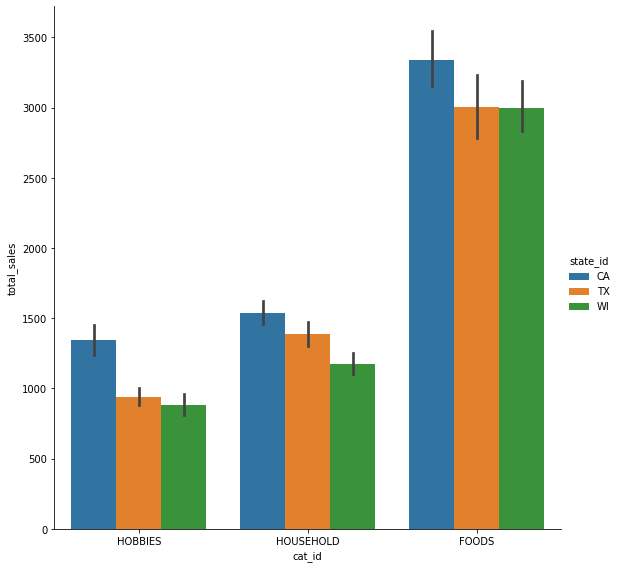

In [8]:
import seaborn as sns
train_sales['total_sales'] = train_sales.sum(axis=1)
sns.catplot(x="cat_id", y="total_sales",
                hue="state_id",
                data=train_sales, kind="bar",
                height=8, aspect=1);

## At the scale of stores

Eventhough California has the best sales, only CA_3 store has an out standing sales. The rest of California stores are just the same as other states, or even has the least sales(CA_4). 

It is quite interesting to see that, even in lease populated states, Walmart still manage to reach certain sales. Perhaps the location and the number of stores in the area are the real factors.

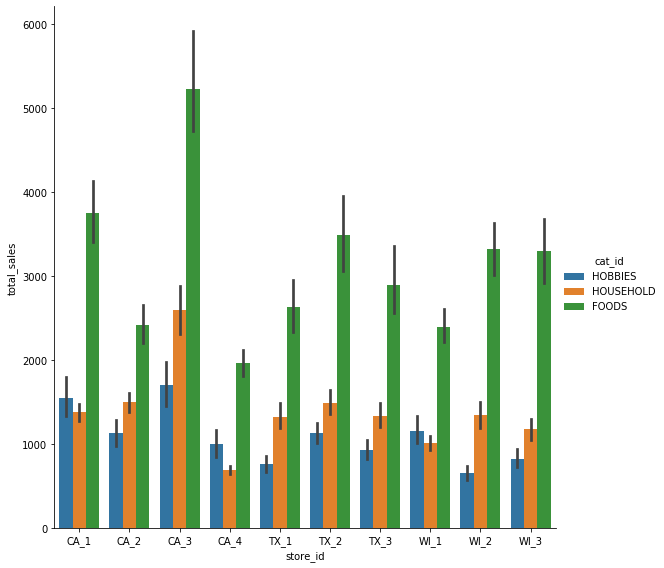

In [9]:
sns.catplot(x="store_id", y="total_sales",
                hue="cat_id",
                data=train_sales, kind="bar",
                height=8, aspect=1);

## Perspective of Time

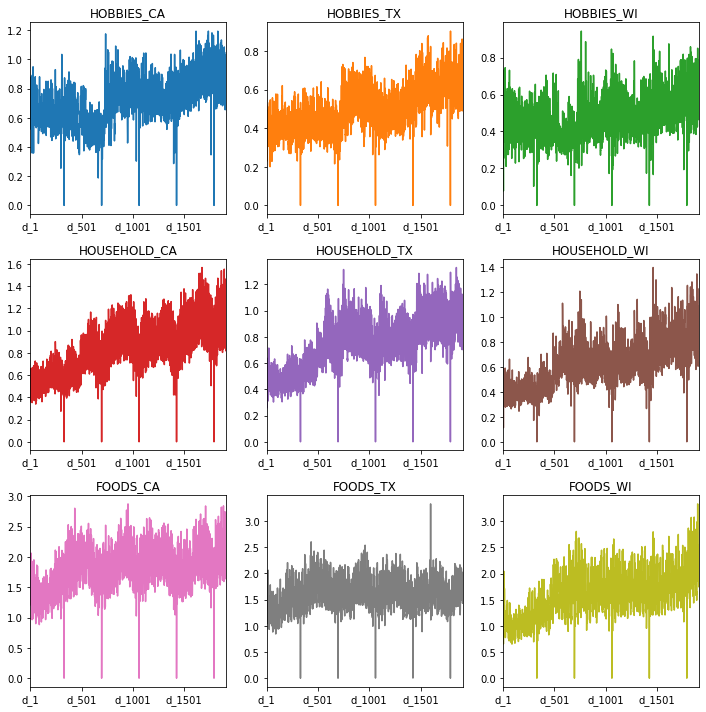

In [10]:
hobbies_state = train_sales.loc[(train_sales['cat_id'] == 'HOBBIES')].groupby(['state_id']).mean().T
hobbies_state = hobbies_state.rename({'CA': 'HOBBIES_CA', 'TX': 'HOBBIES_TX', 'WI': 'HOBBIES_WI'}, axis=1)
household_state = train_sales.loc[(train_sales['cat_id'] == 'HOUSEHOLD')].groupby(['state_id']).mean().T
household_state = household_state.rename({'CA': 'HOUSEHOLD_CA', 'TX': 'HOUSEHOLD_TX', 'WI': 'HOUSEHOLD_WI'}, axis=1)
foods_state = train_sales.loc[(train_sales['cat_id'] == 'FOODS')].groupby(['state_id']).mean().T
foods_state = foods_state.rename({'CA': 'FOODS_CA', 'TX': 'FOODS_TX', 'WI': 'FOODS_WI'}, axis=1)
nine_example = pd.concat([hobbies_state, household_state, foods_state], axis=1)
nine_example = nine_example.drop('total_sales')

from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig, axs = plt.subplots(3,3, figsize=(10,10))
axs = axs.flatten()
ax_idx = 0
for item in nine_example.columns:
    nine_example[item].plot(title=item, color=next(color_cycle), ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

The time length of the upper graph is 5 years long, from 2011 to 2016. It is interesting to that there are yearly patterns in the sales. For example, you can see around every 360 days there is a day when the sale is 0.
As you can see in the following parts, these results are costed by annual events. Like the 0 sales days I just mentioned are cost by Christmas. In the given data sets there are a lot of annual events, some have effects on the sales , and some do not.

## Other special events

Since special events like Christmas affects the sales in every state, perhaps there are other events that also make the sales go lower or higher nationally. In file "calendar", there are 30 differert events. Including Superbowl, Valentines day, Presidents day, etc.

Below shows the stores mean sales in **HOBBIES** of each states, and points out the spacial events. It is pretty obvious that there are some events always appear in the same place compare to the sales trend. For instance, there are always two points beside the Christmas points(those equal to 0). Latter there is a clearer graph to show this.

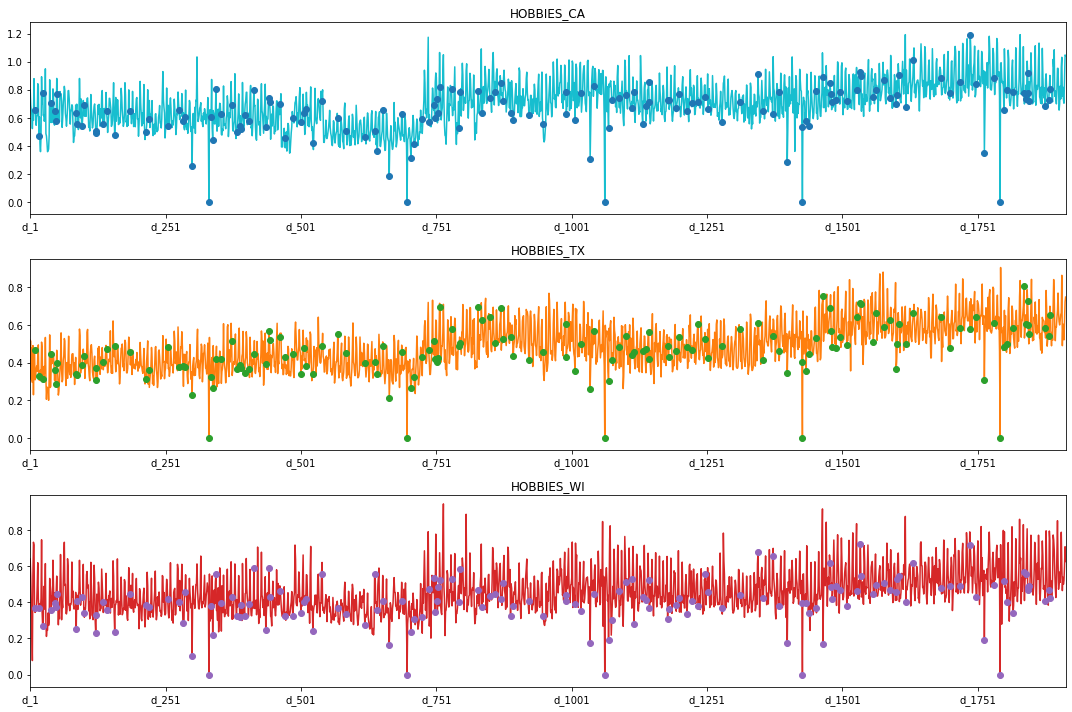

In [11]:
event_date = calendar.loc[calendar['event_name_1'].isin(calendar.event_name_1.unique()[1:])].d
HOBBIES_event = train_sales.loc[(train_sales['cat_id'] == 'HOBBIES')].groupby(['state_id']).mean().T.reset_index()
HOBBIES_event = HOBBIES_event.loc[HOBBIES_event['index'].isin(event_date)]
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
nine_example['HOBBIES_CA'].plot(title='HOBBIES_CA', color=next(color_cycle))
plt.scatter(HOBBIES_event.reset_index().level_0, HOBBIES_event['CA'],color=next(color_cycle), zorder=10)
plt.subplot(3,1,2)
nine_example['HOBBIES_TX'].plot(title='HOBBIES_TX', color=next(color_cycle))
plt.scatter(HOBBIES_event.reset_index().level_0, HOBBIES_event['TX'],color=next(color_cycle), zorder=10)
plt.subplot(3,1,3)
nine_example['HOBBIES_WI'].plot(title='HOBBIES_WI', color=next(color_cycle))
plt.scatter(HOBBIES_event.reset_index().level_0, HOBBIES_event['WI'],color=next(color_cycle), zorder=10)
plt.tight_layout()
plt.show()

## Inspect the data at different time scale

Here we look at the sales from differnt perspectives. Week, month, and year.

### week
In every state and every product type, all the trends of sales are the same. Peak on Saterday , decrease till Thursday, and rise on Friday. Therefore, form a deep valley.

Maybe this is the reason why there is a dense oscillation between growth and recession of the sales through the years.

### month

There is an obvious hill in the curves of "household" and "food" between May and September.

Coinsidently, summer vacation starts from June to August. So, maybe when people start to enjoy their vacations, the needs for food and household increase. And that's why the sales of household and food reach their peaks between June and August. Then strat decreasing in September, when summer vacation ends.

Perhaps this kind of up and down is why when the sales increase everey years, there is an "S" shape trend.
Though there is an interesting thing to point out. While "household" and "food" increase in summer vacation. 

"hobbies" decreases in the exectly same period. And that is pretty weird, shouldn't people go outside and play?? Maybe some Americans can help me understand this.

### year

As the econemy grow in America, yearly sales in every state basically grow every year, except for year 2014. There is quite a bit of a set back in 2014. Perhaps something hug happened in that year.

So here are a few things went on taht year: "Ebola Epidemic Becomes Global Health Crisis", "Rise of ISIS", "California facing extreme drought", "World cup", "Ferguson protests", "Bill Cosby rape"

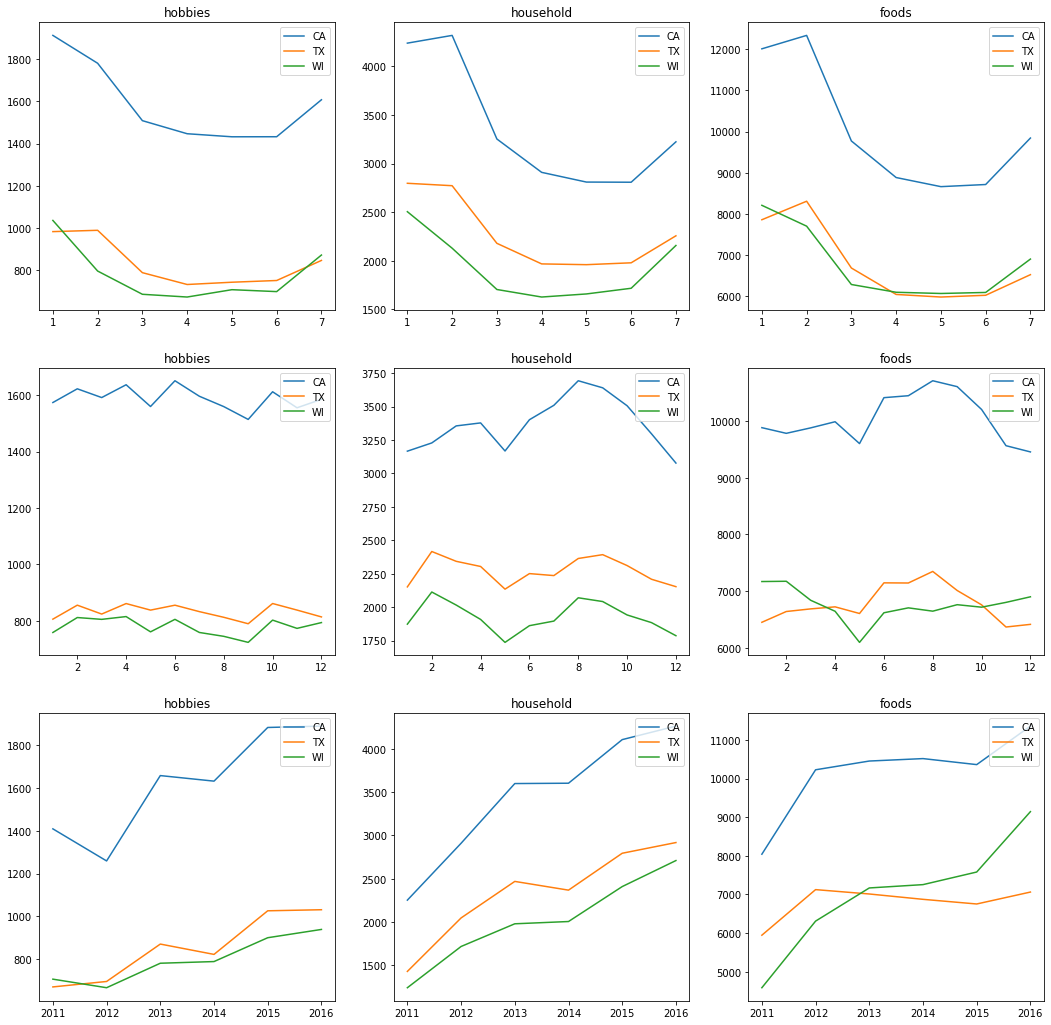

In [13]:
cal = calendar[['d', 'wday', 'month', 'year']]
cal = cal.rename(columns={'d': 'index'})
hobbies_state = train_sales.loc[(train_sales['cat_id'] == 'HOBBIES')].groupby(['state_id']).sum().T
hobbies_state = hobbies_state.reset_index()
hobbies_state = pd.merge(hobbies_state,cal, on='index')
household_state = train_sales.loc[(train_sales['cat_id'] == 'HOUSEHOLD')].groupby(['state_id']).sum().T
household_state = household_state.reset_index()
household_state = pd.merge(household_state,cal, on='index')
foods_state = train_sales.loc[(train_sales['cat_id'] == 'FOODS')].groupby(['state_id']).sum().T
foods_state = foods_state.reset_index()
foods_state = pd.merge(foods_state,cal, on='index')

plt.figure(figsize=(18, 18))
plt.subplot(3,3,1)
plt.title('hobbies')
plt.plot(range(1, 7 + 1 ,1), hobbies_state.groupby(['wday']).mean().CA, label='CA')
plt.plot(range(1, 7 + 1 ,1), hobbies_state.groupby(['wday']).mean().TX, label='TX')
plt.plot(range(1, 7 + 1 ,1), hobbies_state.groupby(['wday']).mean().WI, label='WI')
plt.legend(loc='upper right')
plt.subplot(3,3,2)
plt.title('household')
plt.plot(range(1, 7 + 1 ,1), household_state.groupby(['wday']).mean().CA, label='CA')
plt.plot(range(1, 7 + 1 ,1), household_state.groupby(['wday']).mean().TX, label='TX')
plt.plot(range(1, 7 + 1 ,1), household_state.groupby(['wday']).mean().WI, label='WI')
plt.legend(loc='upper right')
plt.subplot(3,3,3)
plt.title('foods')
plt.plot(range(1, 7 + 1 ,1), foods_state.groupby(['wday']).mean().CA, label='CA')
plt.plot(range(1, 7 + 1 ,1), foods_state.groupby(['wday']).mean().TX, label='TX')
plt.plot(range(1, 7 + 1 ,1), foods_state.groupby(['wday']).mean().WI, label='WI')
plt.legend(loc='upper right')
plt.subplot(3,3,4)
plt.title('hobbies')
plt.plot(range(1, 12 + 1 ,1), hobbies_state.groupby(['month']).mean().CA, label='CA')
plt.plot(range(1, 12 + 1 ,1), hobbies_state.groupby(['month']).mean().TX, label='TX')
plt.plot(range(1, 12 + 1 ,1), hobbies_state.groupby(['month']).mean().WI, label='WI')
plt.legend(loc='upper right')
plt.subplot(3,3,5)
plt.title('household')
plt.plot(range(1, 12 + 1 ,1), household_state.groupby(['month']).mean().CA, label='CA')
plt.plot(range(1, 12 + 1 ,1), household_state.groupby(['month']).mean().TX, label='TX')
plt.plot(range(1, 12 + 1 ,1), household_state.groupby(['month']).mean().WI, label='WI')
plt.legend(loc='upper right')
plt.subplot(3,3,6)
plt.title('foods')
plt.plot(range(1, 12 + 1 ,1), foods_state.groupby(['month']).mean().CA, label='CA')
plt.plot(range(1, 12 + 1 ,1), foods_state.groupby(['month']).mean().TX, label='TX')
plt.plot(range(1, 12 + 1 ,1), foods_state.groupby(['month']).mean().WI, label='WI')
plt.legend(loc='upper right')
plt.subplot(3,3,7)
plt.title('hobbies')
plt.plot(range(2011, 2016 + 1 ,1), hobbies_state.groupby(['year']).mean().CA, label='CA')
plt.plot(range(2011, 2016 + 1 ,1), hobbies_state.groupby(['year']).mean().TX, label='TX')
plt.plot(range(2011, 2016 + 1 ,1), hobbies_state.groupby(['year']).mean().WI, label='WI')
plt.legend(loc='upper right')
plt.subplot(3,3,8)
plt.title('household')
plt.plot(range(2011, 2016 + 1 ,1), household_state.groupby(['year']).mean().CA, label='CA')
plt.plot(range(2011, 2016 + 1 ,1), household_state.groupby(['year']).mean().TX, label='TX')
plt.plot(range(2011, 2016 + 1 ,1), household_state.groupby(['year']).mean().WI, label='WI')
plt.legend(loc='upper right')
plt.subplot(3,3,9)
plt.title('foods')
plt.plot(range(2011, 2016 + 1 ,1), foods_state.groupby(['year']).mean().CA, label='CA')
plt.plot(range(2011, 2016 + 1 ,1), foods_state.groupby(['year']).mean().TX, label='TX')
plt.plot(range(2011, 2016 + 1 ,1), foods_state.groupby(['year']).mean().WI, label='WI')
plt.legend(loc='upper right')

plt.show()

## Perspective of price

Here are a few funny things in these two graphs. The upper one shows the prices of hobbies_1 through the time series. The lower one shows the sales through the time series. Here are the funny stuffs:
Whenever there is a raise in price, there is a drop in sales.

After a drop in sales, it slowly climbs back. Then walmart raise it's price again, sales drops again. As this goes, walmart manages to get more money without losing customers in the long term.
Walmart raise it's price nationally.

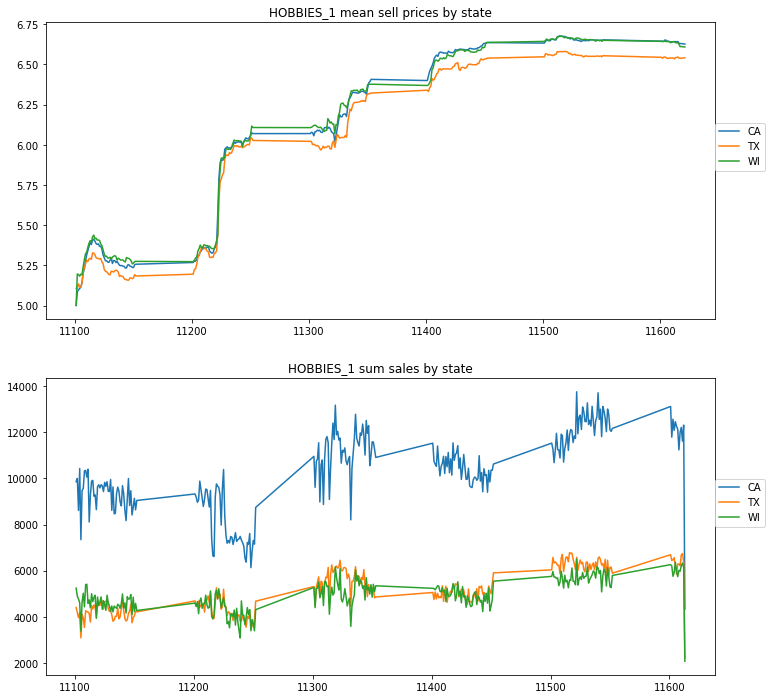

In [16]:
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
hobbies_1_prices = sell_prices.loc[sell_prices['item_id'].str.contains('HOBBIES_1')]
hobbies_1_prices_CA = hobbies_1_prices.loc[hobbies_1_prices['store_id'].str.contains('CA')]
hobbies_1_prices_TX = hobbies_1_prices.loc[hobbies_1_prices['store_id'].str.contains('TX')]
hobbies_1_prices_WI = hobbies_1_prices.loc[hobbies_1_prices['store_id'].str.contains('WI')]
grouped_CA = hobbies_1_prices_CA.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_CA.index, grouped_CA.values, label="CA")
grouped_TX = hobbies_1_prices_TX.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_TX.index, grouped_TX.values, label="TX")
grouped_WI = hobbies_1_prices_WI.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_WI.index, grouped_WI.values, label="WI")
plt.legend(loc=(1.0, 0.5))
plt.title('HOBBIES_1 mean sell prices by state');
plt.subplot(2,1,2)
cal = calendar[['wm_yr_wk', 'd']]
cal = cal.rename(columns={"d": "index"})
hobbies_1 = train_sales.loc[train_sales['item_id'].str.contains('HOBBIES_1')]
hobbies_1_CA = hobbies_1.loc[hobbies_1['store_id'].str.contains('CA')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
hobbies_1_TX = hobbies_1.loc[hobbies_1['store_id'].str.contains('TX')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
hobbies_1_WI = hobbies_1.loc[hobbies_1['store_id'].str.contains('WI')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
hobbies_1_CA = pd.merge(hobbies_1_CA, cal, on='index')
hobbies_1_TX = pd.merge(hobbies_1_TX, cal, on='index')
hobbies_1_WI = pd.merge(hobbies_1_WI, cal, on='index')
grouped_CA = hobbies_1_CA.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_CA.index, grouped_CA.values, label="CA")
grouped_TX = hobbies_1_TX.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_TX.index, grouped_TX.values, label="TX")
grouped_WI = hobbies_1_WI.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_WI.index, grouped_WI.values, label="WI")
plt.legend(loc=(1.0, 0.5))
plt.title('HOBBIES_1 sum sales by state');

## Find the sales with different mean

Here I use simple moving average, weighted moving average, and exponential moving average to find the tendency of sales in the close period.

As you can see in the graph each mean method revealed different tendency. This might come handy in the feature.

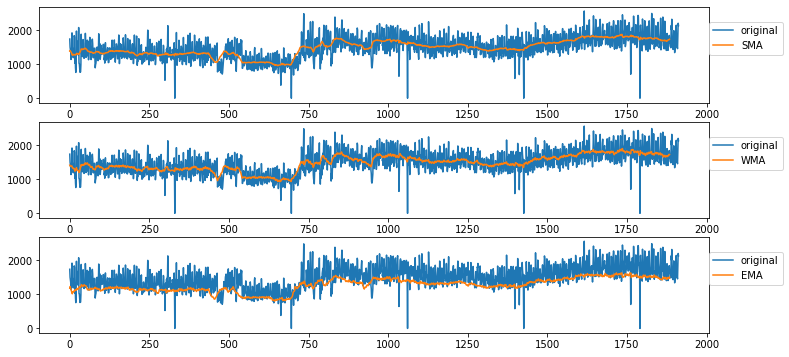

In [19]:
def SMA(days, n):
    total = 0
    for i in range(n):
        total = total + days[i]
    return total/n

def count_SMA(orig, n):
    ret = np.zeros(len(orig) - n)
    for i in range(len(ret)):
        ret[i] = SMA(np.array(orig[i:i+n]), n)
    return ret

def WMA(days, n):
    total = 0
    dev = 0
    for i in range(n):
        total = total + (n-i)*days[i]
        dev = dev + (n-i)
    return total/dev

def count_WMA(orig, n):
    ret = np.zeros(len(orig) - n)
    for i in range(len(ret)):
        ret[i] = WMA(np.array(orig[i:i+n]), n)
    return ret

def EMA(days, n):
    total = 0
    a = 2/(n+1)
    for i in range(n):
        total = total + a*(days[i] - total)
    return total

def count_EMA(orig, n):
    ret = np.zeros(len(orig) - n)
    for i in range(len(ret)):
        ret[i] = EMA(np.array(orig[i:i+n]), n)
    return ret

hobbies_1_CA = hobbies_1_CA.rename(columns={0: "sales"})

CA_SMA_28 = count_SMA(hobbies_1_CA['sales'], 28)
CA_WMA_28 = count_WMA(hobbies_1_CA['sales'], 28)
CA_EMA_28 = count_EMA(hobbies_1_CA['sales'], 28)

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
plt.plot(range(len(hobbies_1_CA['sales'])), hobbies_1_CA['sales'], label="original")
plt.plot(range(len(CA_SMA_28)), CA_SMA_28, label="SMA")
plt.legend(loc=(1.0, 0.5))
plt.subplot(3,1,2)
plt.plot(range(len(hobbies_1_CA['sales'])), hobbies_1_CA['sales'], label="original")
plt.plot(range(len(CA_WMA_28)), CA_WMA_28, label="WMA")
plt.legend(loc=(1.0, 0.5))
plt.subplot(3,1,3)
plt.plot(range(len(hobbies_1_CA['sales'])), hobbies_1_CA['sales'], label="original")
plt.plot(range(len(CA_EMA_28)), CA_EMA_28, label="EMA")
plt.legend(loc=(1.0, 0.5))
plt.show()